right now, this compares 9 channel CNN vs. GLMs, in terms of raw performance (cc^2 or cc), on ALL neurons (so no subset stuff yet)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def check_all(squared, score_col_name):
    models_to_examine = [
        ('glm', 'linear_poisson'),
        ('glm', 'linear_softplus'),
        ('glm', 'fpower_poisson'),
#         ('glm', 'fpower_softplus'),
        ('glm', 'gqm.2_poisson'),
        ('glm', 'gqm.4_poisson'),
        ('glm', 'gqm.8_poisson'),
        ('glm', 'linear_gaussian'),
        ('glm', 'fpower_gaussian'),
        ('glm', 'gqm.2_gaussian'),
        ('glm', 'gqm.4_gaussian'),
        ('glm', 'gqm.8_gaussian'),
    ] # TODO should make this a ordered dict.
      # so that it will be easier to collect best val model for each model class.
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                            score_col_name=score_col_name)

In [4]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').xs(100, level='percentage').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [5]:
# this is the way to change a multiindex's names.
# df_all.index.rename(['haha','haha2','haha3'], inplace=True)

In [6]:
# OT neurons. these numbers are little lower than Fig A.5 and Fig 6 of first submission. 
# as expected, due to previous model's overfitting.
df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset')

subset                                            OT       all
dataset    model                                              
MkA_Shape  glm_fpower_gaussian$False/False  0.290779  0.229470
           glm_fpower_poisson$False/False   0.299176  0.237842
           glm_gqm.2_gaussian$False/False   0.216731  0.288999
           glm_gqm.2_poisson$False/False    0.246806  0.326529
           glm_gqm.4_gaussian$False/False   0.252146  0.323244
           glm_gqm.4_poisson$False/False    0.280782  0.359889
           glm_gqm.8_gaussian$False/False   0.260205  0.318879
           glm_gqm.8_poisson$False/False    0.277170  0.351061
           glm_linear_gaussian$False/False  0.157956  0.145404
           glm_linear_poisson$False/False   0.178910  0.164772
           glm_linear_softplus$False/False  0.189822  0.169272
MkE2_Shape glm_fpower_gaussian$False/False  0.291955  0.248395
           glm_fpower_poisson$False/False   0.289153  0.250836
           glm_gqm.2_gaussian$False/False   0.280255  0.379620
           glm_gqm.2_poisson$False/False    0.308030  0.415099
           glm_gqm.4_gaussian$False/False   0.295268  0.402021
           glm_gqm.4_poisson$False/False    0.308235  0.433565
           glm_gqm.8_gaussian$False/False   0.282770  0.385403
           glm_gqm.8_poisson$False/False    0.289890  0.413524
           glm_linear_gaussian$False/False  0.201432  0.200867
           glm_linear_poisson$False/False   0.231406  0.232404

In [7]:
# HO neurons
df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset')

subset                                            OT       all
dataset    model                                              
MkA_Shape  glm_fpower_gaussian$False/False  0.157410  0.180182
           glm_fpower_poisson$False/False   0.158648  0.186996
           glm_gqm.2_gaussian$False/False   0.120454  0.210852
           glm_gqm.2_poisson$False/False    0.122783  0.236626
           glm_gqm.4_gaussian$False/False   0.124060  0.230580
           glm_gqm.4_poisson$False/False    0.128318  0.255681
           glm_gqm.8_gaussian$False/False   0.123884  0.229852
           glm_gqm.8_poisson$False/False    0.124440  0.251566
           glm_linear_gaussian$False/False  0.111088  0.111855
           glm_linear_poisson$False/False   0.114884  0.123476
           glm_linear_softplus$False/False  0.117082  0.126256
MkE2_Shape glm_fpower_gaussian$False/False  0.144610  0.169624
           glm_fpower_poisson$False/False   0.143874  0.176236
           glm_gqm.2_gaussian$False/False   0.122512  0.222055
           glm_gqm.2_poisson$False/False    0.127881  0.255035
           glm_gqm.4_gaussian$False/False   0.127785  0.240068
           glm_gqm.4_poisson$False/False    0.130375  0.272207
           glm_gqm.8_gaussian$False/False   0.119161  0.235262
           glm_gqm.8_poisson$False/False    0.120617  0.262885
           glm_linear_gaussian$False/False  0.100213  0.114381
           glm_linear_poisson$False/False   0.105756  0.133198

In [8]:
# ok. time to plot.
# this time I will only plot Monkey A,
# one for gqm.4 gaussian vs. poisson
# another for linear poisson vs softplus.

In [9]:
from tang_jcompneuro.plotting import image_subset_and_neuron_subset_list, show_one_basic

In [10]:
from tang_jcompneuro import dir_dictionary
import os.path

In [11]:
# magic numbers here follow
# https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_glm_opt_detailed.ipynb
def draw_one_stuff(model_name_x, model_name_y, save=None):
    # draw one by one.
    model_name_x_real = f'glm_{model_name_x}$False/False'
    model_name_y_real = f'glm_{model_name_y}$False/False'
    
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=True, sharey=True, squeeze=False,
                            figsize=(5.5,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
        data_x = df_all_cc2.at[('MkA_Shape', img_subset, model_name_x_real), 'cc2'][neuron_subset]['raw']
        data_y = df_all_cc2.at[('MkA_Shape', img_subset, model_name_y_real), 'cc2'][neuron_subset]['raw']
        show_one_basic(data_x, data_y, title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                      ax=ax,mean_title='mean $CC_\mathrm{norm}^2$', xlabel=model_name_x,
                      ylabel=model_name_y  if idx == 0 else None)
    fig.suptitle(f'{model_name_y} vs. {model_name_x} on monkey A')
    # adjust figure 
    fig.subplots_adjust(top=0.75, bottom=0.175, left=0.1, right=0.98, hspace=0.1, wspace=0.075)
    
    if save is not None:
        save_dir = os.path.join(dir_dictionary['plots'], 'supp', 'glm_nonlinearity')
        os.makedirs(save_dir, exist_ok=True)
        fig.savefig(os.path.join(save_dir, f'{save}.pdf'), dpi=300)
    
    plt.show()
    

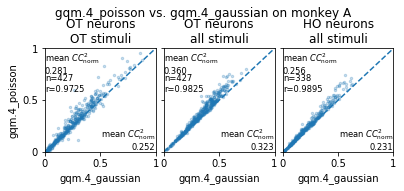

In [12]:
draw_one_stuff('gqm.4_gaussian', 'gqm.4_poisson', 'a_gqm4_p_vs_g')

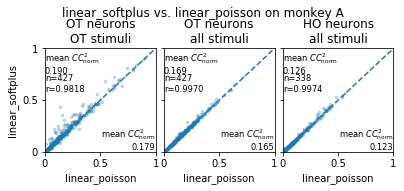

In [13]:
draw_one_stuff('linear_poisson', 'linear_softplus', 'a_linear_s_vs_p')